In [2]:
# Read in dataset
import pandas as pd

apps_with_duplicates = pd.read_csv("C:/Users/KIIT0001/Desktop/Oasis Infobyte Data Analytics/Unveiling the Android App Market Analyzing Google Play Store Data/googleplaystore.csv")


# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Have a look at a random sample of 5 rows
apps.sample(5)

Total number of apps in the dataset =  10841


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2120,2120,My Little Pony: Harmony Quest,FAMILY,4.1,148295,26M,"10,000,000+",Free,0,Everyone,Casual;Action & Adventure,5-Mar-18,1.6,4.1 and up
7498,7498,cloudLibrary,BOOKS_AND_REFERENCE,4.0,10774,35M,"100,000+",Free,0,Everyone,Books & Reference,28-Jun-18,3.8.10,4.1 and up
6335,6335,BJ card game blackjack,GAME,NaN,3,21M,500+,Free,0,Teen,Card,2-Dec-16,1,2.3 and up
8158,8158,Strava.cz,SHOPPING,4.3,2221,Varies with device,"100,000+",Free,0,Everyone,Shopping,10-Jul-18,Varies with device,Varies with device
2020,2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46M,"1,000,000+",Free,0,Everyone,Educational;Education,16-Jul-18,1.1.6.7,4.1 and up


In [3]:
# List of characters to remove
chars_to_remove = ['+', ',','$']
# List of column names to clean
cols_to_clean = ['Installs','Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10833 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB
None


In [9]:
import pandas as pd
import numpy as np

# Load the dataset (replace this with your actual path if needed)
apps = pd.read_csv("C:/Users/KIIT0001/Desktop/Oasis Infobyte Data Analytics/Unveiling the Android App Market Analyzing Google Play Store Data/googleplaystore.csv")

# Clean 'Installs' column
apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True)  # remove '+' and ','
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')       # convert to float, set invalid entries to NaN

# Clean 'Price' column
apps['Price'] = apps['Price'].str.replace('$', '', regex=False)           # remove '$'
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')             # convert to float, set invalid entries to NaN

# Optional: drop rows with NaNs in these columns if needed
# apps.dropna(subset=['Installs', 'Price'], inplace=True)

# Check data types
print(apps.dtypes)


Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [10]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  34


In [11]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.193338315362443


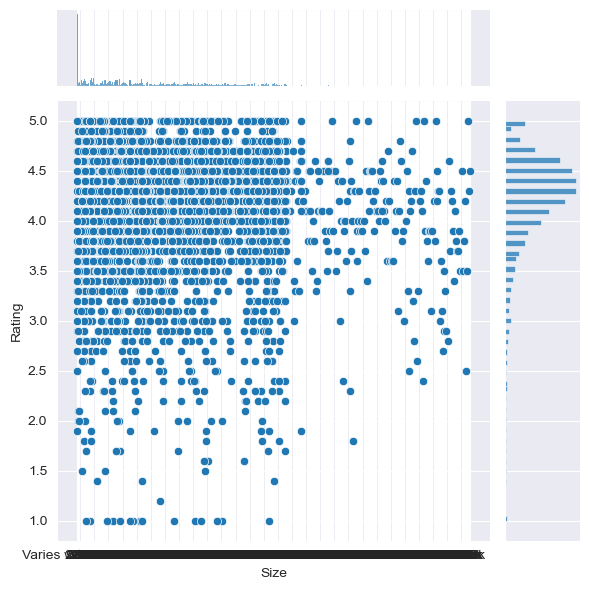

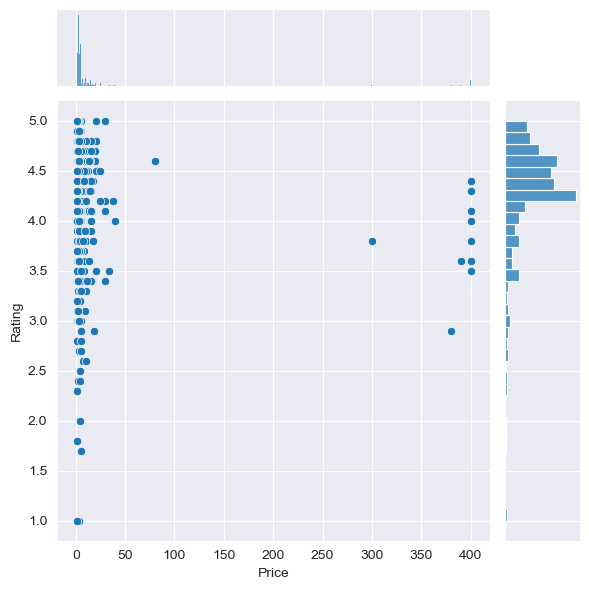

<Figure size 800x600 with 0 Axes>

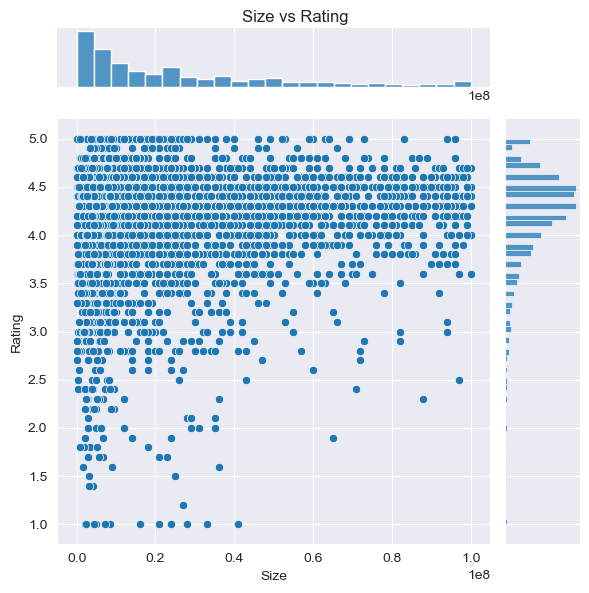

<Figure size 800x600 with 0 Axes>

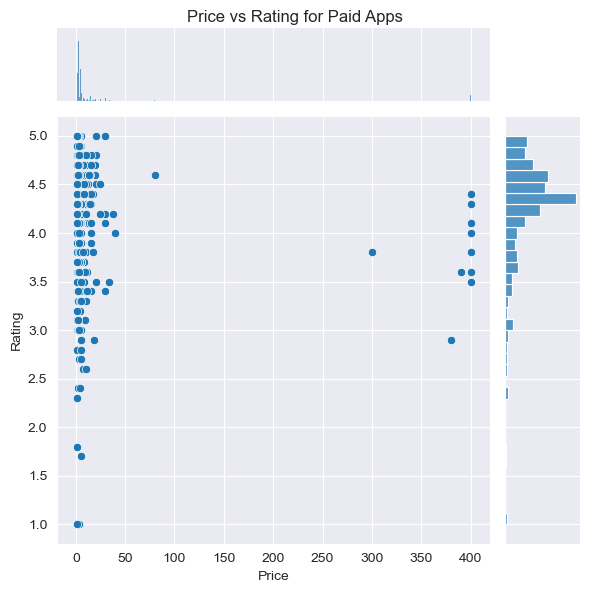

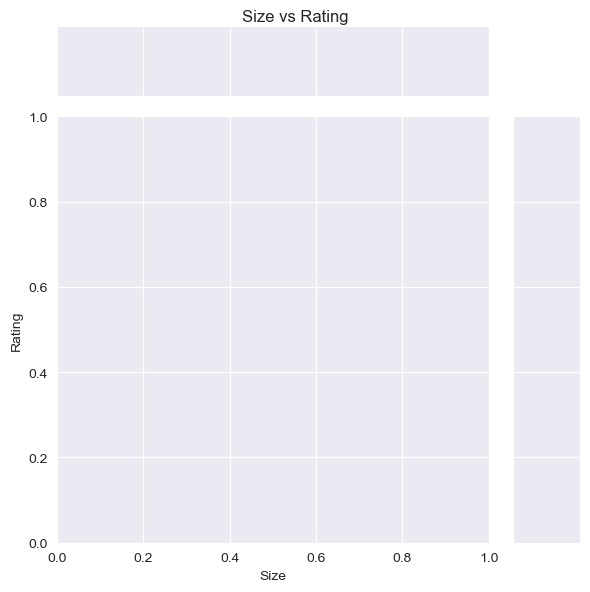

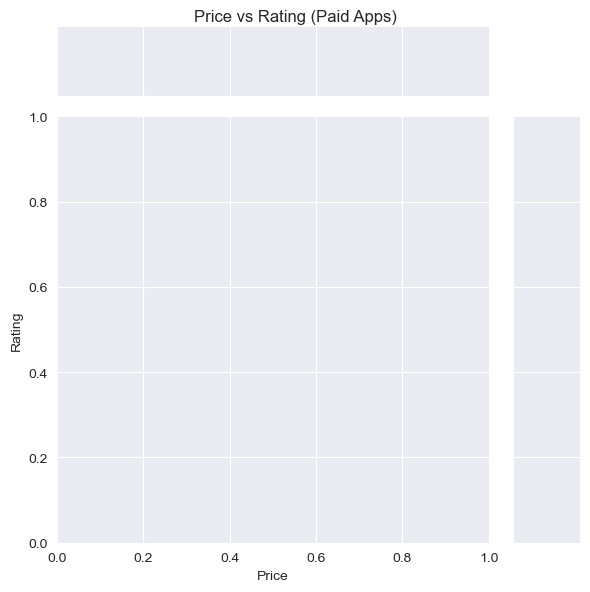

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Clean the 'Size' column
def convert_size(size_str):
    if isinstance(size_str, str):
        if size_str.endswith('M'):
            return float(size_str.replace('M', '')) * 1e6
        elif size_str.endswith('k'):
            return float(size_str.replace('k', '')) * 1e3
    return np.nan

apps['Size'] = apps['Size'].apply(convert_size)

# Convert and clean other columns
apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')
apps['Price'] = apps['Price'].astype(str).str.replace('$', '', regex=False)
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')

# Filter apps with valid Size and Rating
apps_with_size_and_rating_present = apps[apps['Rating'].notnull() & apps['Size'].notnull()]

# Filter categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot Size vs Rating
plt1 = sns.jointplot(data=large_categories, x='Size', y='Rating')
plt1.fig.suptitle('Size vs Rating', fontsize=12)
plt1.fig.tight_layout()
plt1.fig.subplots_adjust(top=0.95)
plt.show()  # ← show the first plot

# Filter paid apps
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot Price vs Rating
plt2 = sns.jointplot(data=paid_apps, x='Price', y='Rating')
plt2.fig.suptitle('Price vs Rating (Paid Apps)', fontsize=12)
plt2.fig.tight_layout()
plt2.fig.subplots_adjust(top=0.95)
plt.show()  # ← show the second plot


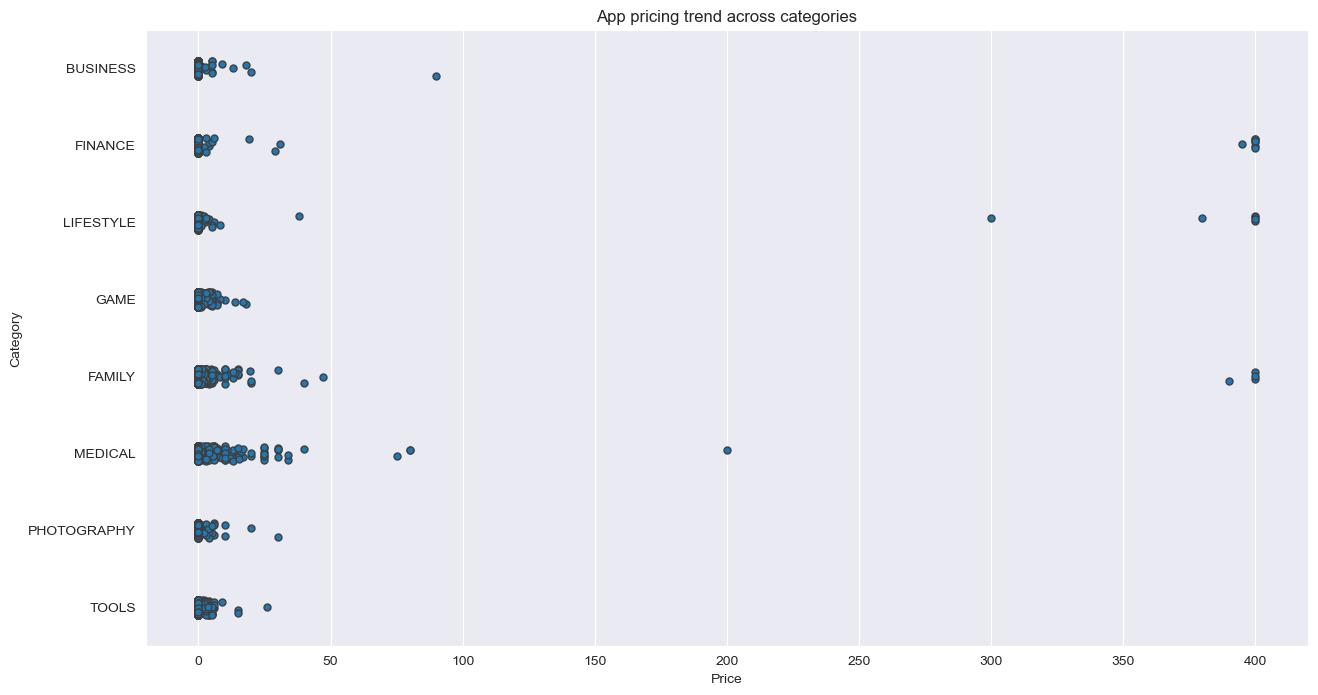

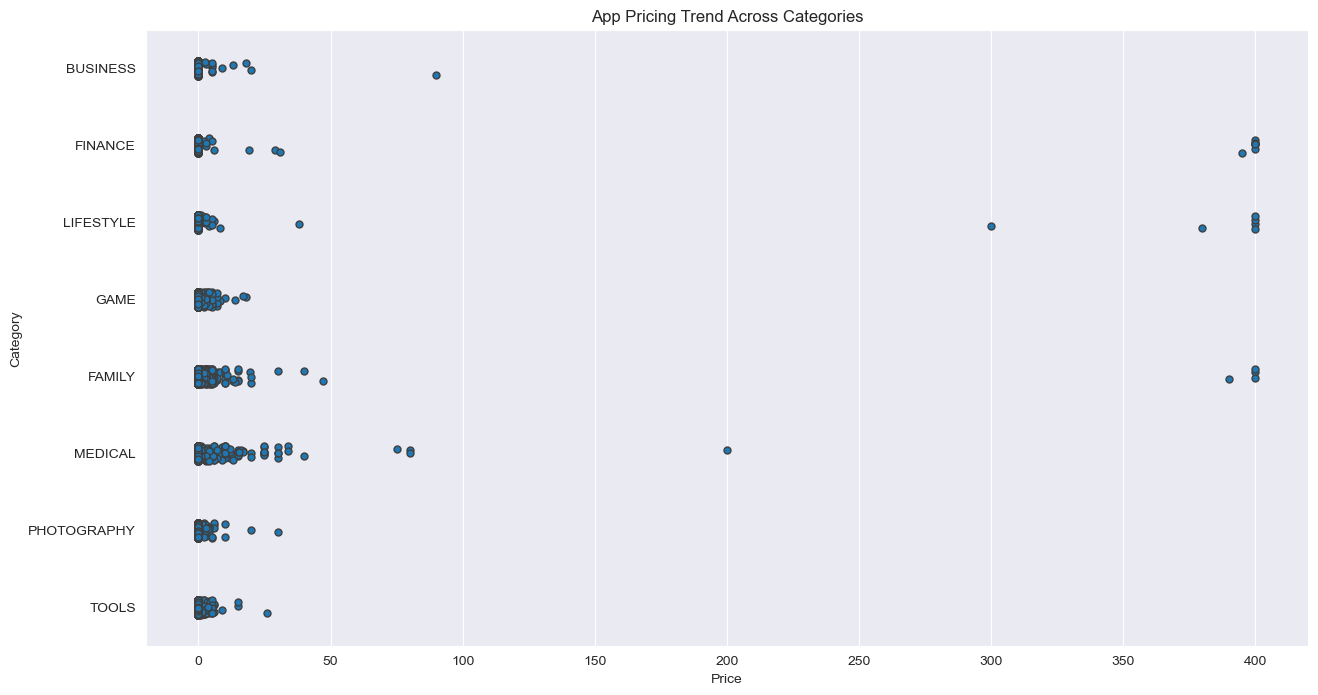

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps['Category'].isin([
    'GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS',
    'FINANCE', 'LIFESTYLE', 'BUSINESS'
])]

# Create a strip plot for Price vs Category
ax = sns.stripplot(
    x=popular_app_cats['Price'],
    y=popular_app_cats['Category'],
    jitter=True,
    linewidth=1
)

ax.set_title('App Pricing Trend Across Categories')

# Show the plot
plt.show()

# Filter apps with price above 200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]


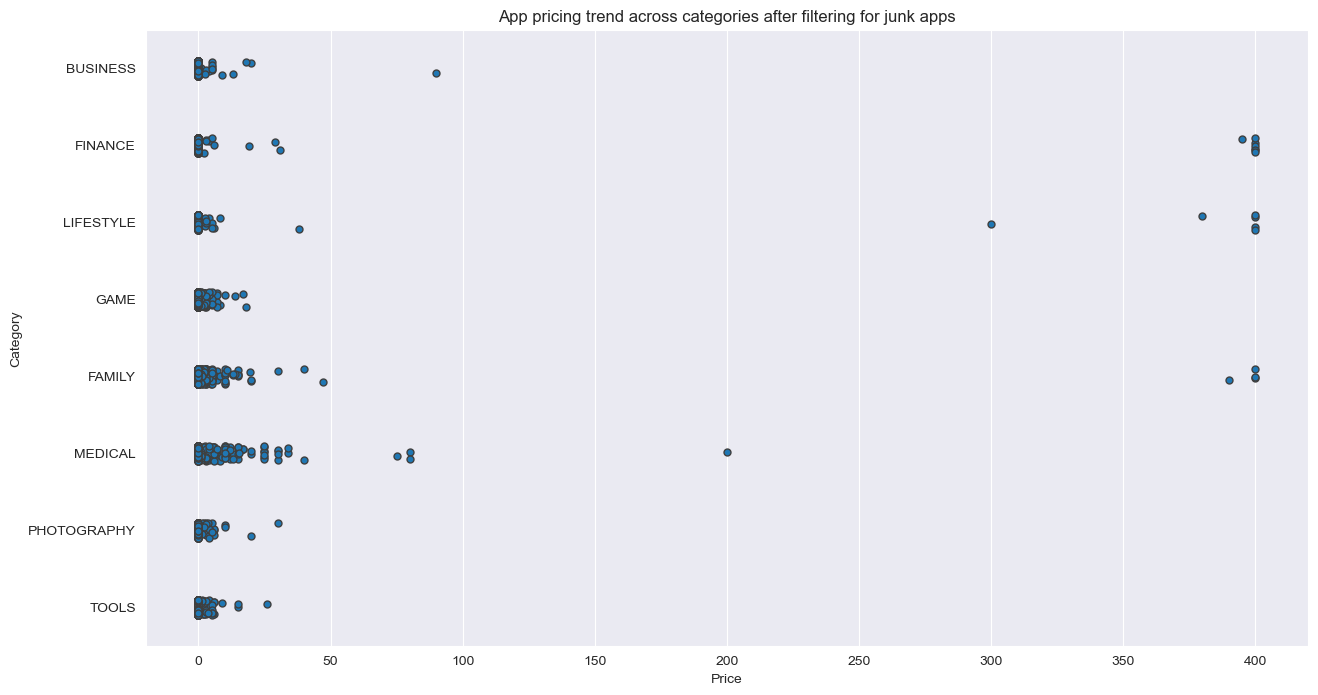

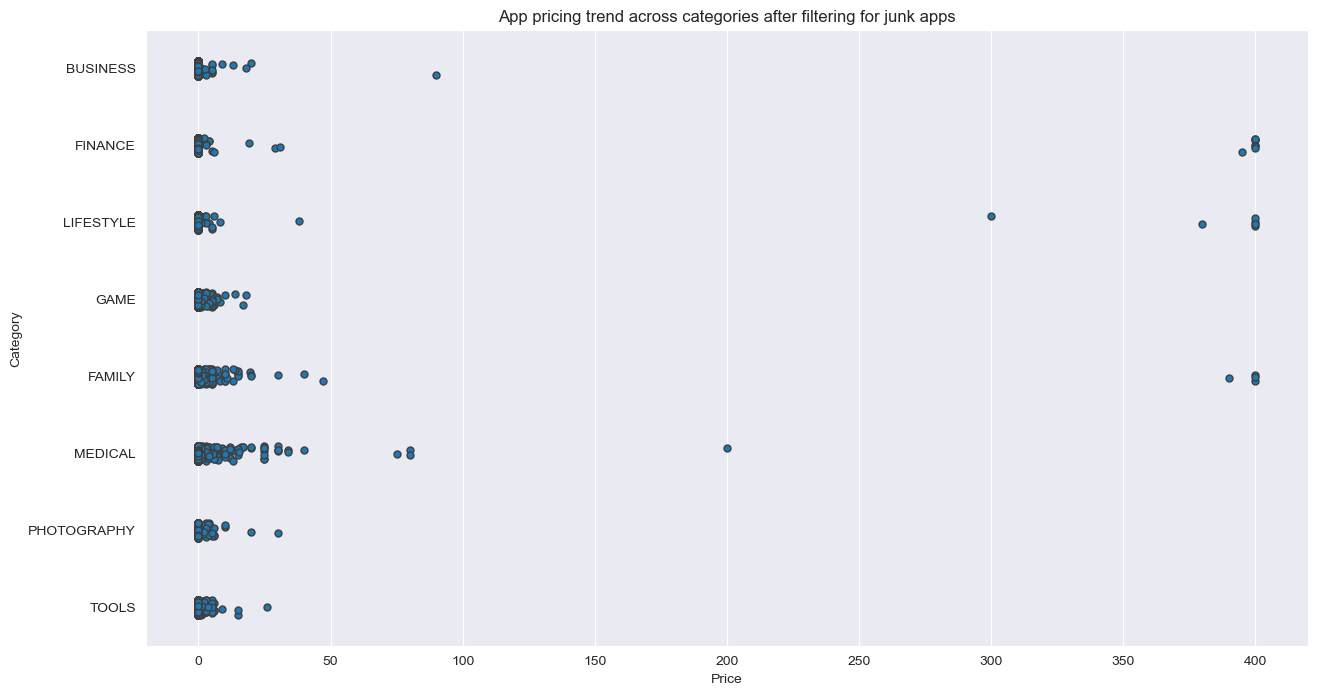

In [18]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], data = apps, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')
plt.show()

In [19]:
apps['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [20]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [21]:
apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

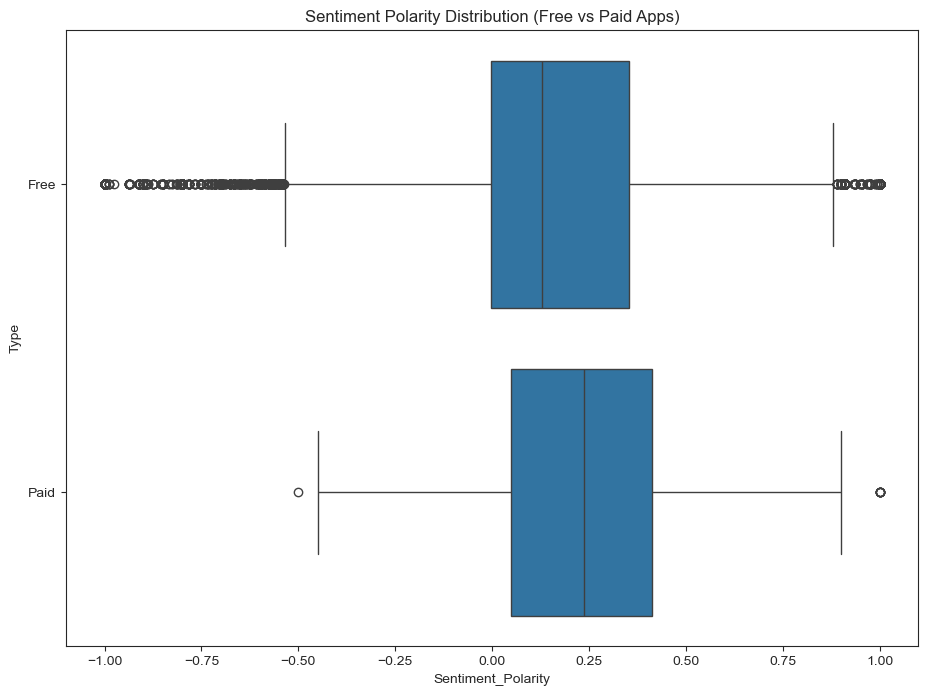

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets using the provided paths
apps = pd.read_csv("C:/Users/KIIT0001/Desktop/Oasis Infobyte Data Analytics/Unveiling the Android App Market Analyzing Google Play Store Data/googleplaystore.csv")
reviews_df = pd.read_csv("C:/Users/KIIT0001/Desktop/Oasis Infobyte Data Analytics/Unveiling the Android App Market Analyzing Google Play Store Data/user_reviews.csv")

# Merge datasets on 'App'
merged_df = pd.merge(apps, reviews_df, on='App')

# Drop rows with missing Sentiment, Translated_Review, or Sentiment_Polarity
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review', 'Sentiment_Polarity'])

# Plot sentiment polarity distribution for Paid vs Free apps
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x='Sentiment_Polarity', y='Type', data=merged_df)
ax.set_title('Sentiment Polarity Distribution (Free vs Paid Apps)')
plt.show()
